<a href="https://colab.research.google.com/github/andrillion/travel-site/blob/master/Kopia_av_california_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## California Housing Prices (Linear regression model)


### Import libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
from google.colab import files
uploaded = files.upload()

# The uploaded file will be saved in the current working directory
# To verify, you can list files in the current directory
import os
print(os.listdir())


Saving housing.csv to housing.csv
['.config', 'drive', 'housing.csv', 'sample_data']


In [68]:
import shutil

# Define the path where you want to move the file in Google Drive
drive_path = '/content/drive/My Drive/'

# Move the uploaded file to Google Drive
shutil.move('housing.csv', drive_path + 'housing.csv')


'/content/drive/My Drive/housing.csv'

In [72]:
import os

# Define the root path and the file name you are looking for
root_path = '/content/drive/My Drive/'
search_filename = 'housing.csv'  # Replace with your file name or pattern

# Function to search for the file
def find_file(root_path, search_filename):
    for path, subdirs, files in os.walk(root_path):
        for name in files:
            if search_filename in name:
                return os.path.join(path, name)
    return None

# Search for the file
file_path = find_file(root_path, search_filename)

# Print the file path if found
if file_path:
    print(f'File found: {file_path}')
else:
    print('File not found')



File found: /content/drive/My Drive/housing.csv


In [73]:
df = pd.read_csv("/content/drive/My Drive/housing.csv")

### Data Exploration

In [216]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [219]:
df.dropna(inplace = True) # get rid of the rows where total_bedrooms have missing values

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [221]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [222]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis = 1)   # use all columns except median_house_value as features, axis=1 means drop column
y = df['median_house_value']    # use median_house_value as our label

In [223]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming you have a pandas DataFrame df
# And 'target' is the name of the target column

X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

# Identify the categorical variable to stratify on
stratify_col = df['ocean_proximity']  # Replace 'category_column' with the name of your categorical column

# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in stratified_split.split(X, stratify_col):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Now X_train, X_test, y_train, y_test are your stratified train and test sets


In [224]:
# Count the values of each category in the ocean_proximity column for both the train and test sets
train_counts = X_train['ocean_proximity'].value_counts()
test_counts = X_test['ocean_proximity'].value_counts()

print("Train category counts:")
print(train_counts)
print("\nTest category counts:")
print(test_counts)

Train category counts:
ocean_proximity
<1H OCEAN     7227
INLAND        5197
NEAR OCEAN    2102
NEAR BAY      1816
ISLAND           4
Name: count, dtype: int64

Test category counts:
ocean_proximity
<1H OCEAN     1807
INLAND        1299
NEAR OCEAN     526
NEAR BAY       454
ISLAND           1
Name: count, dtype: int64


In [225]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [226]:
train_data = X_train.join(y_train)

In [227]:
test_data = X_test.join(y_test)

In [228]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,INLAND,63300.0
7962,-118.19,33.87,35.0,1769.0,436.0,1166.0,386.0,2.8750,<1H OCEAN,178300.0
9321,-122.53,37.97,44.0,3595.0,953.0,1831.0,910.0,2.6036,NEAR BAY,287500.0
5034,-118.33,33.98,38.0,3063.0,796.0,2153.0,721.0,1.8472,<1H OCEAN,149100.0
17936,-121.95,37.35,52.0,2382.0,523.0,1096.0,492.0,4.2656,<1H OCEAN,236100.0
...,...,...,...,...,...,...,...,...,...,...
11789,-121.23,38.79,45.0,907.0,176.0,463.0,190.0,2.2292,INLAND,92000.0
8754,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,<1H OCEAN,330000.0
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,<1H OCEAN,325000.0
17997,-121.96,37.28,33.0,1940.0,327.0,877.0,314.0,5.4386,<1H OCEAN,280400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

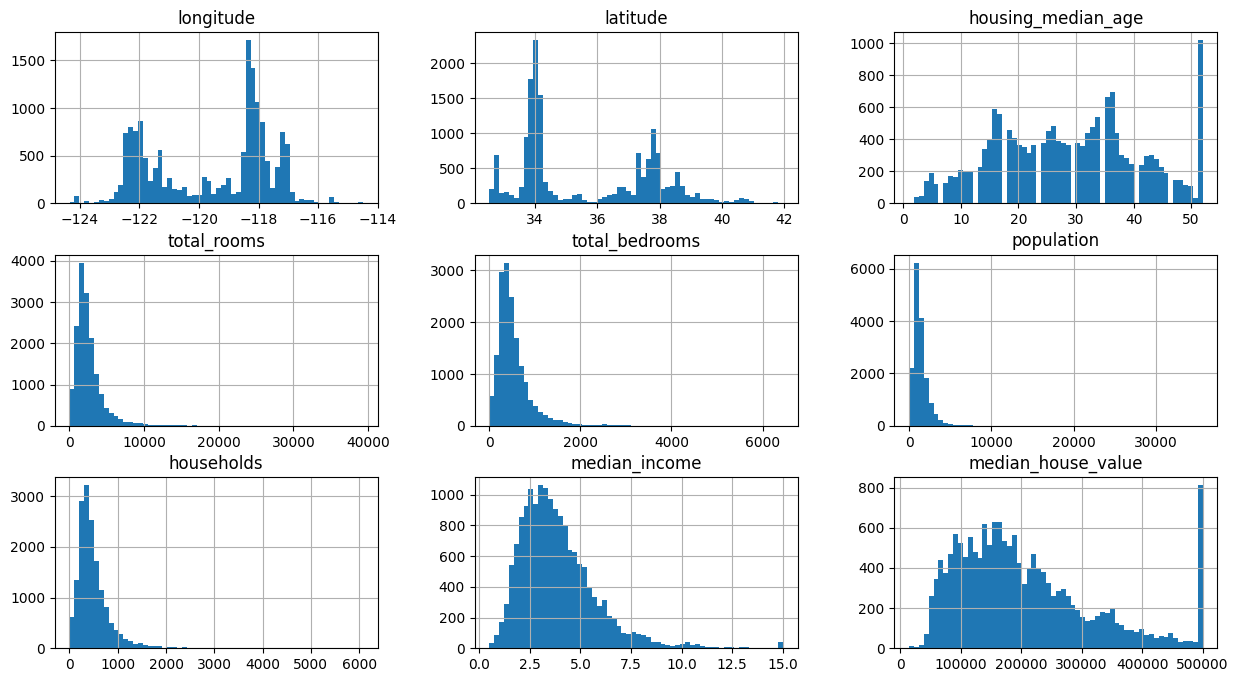

In [229]:
train_data.hist(bins = 60, figsize = (15,8))  # plots histograms for numerical columns

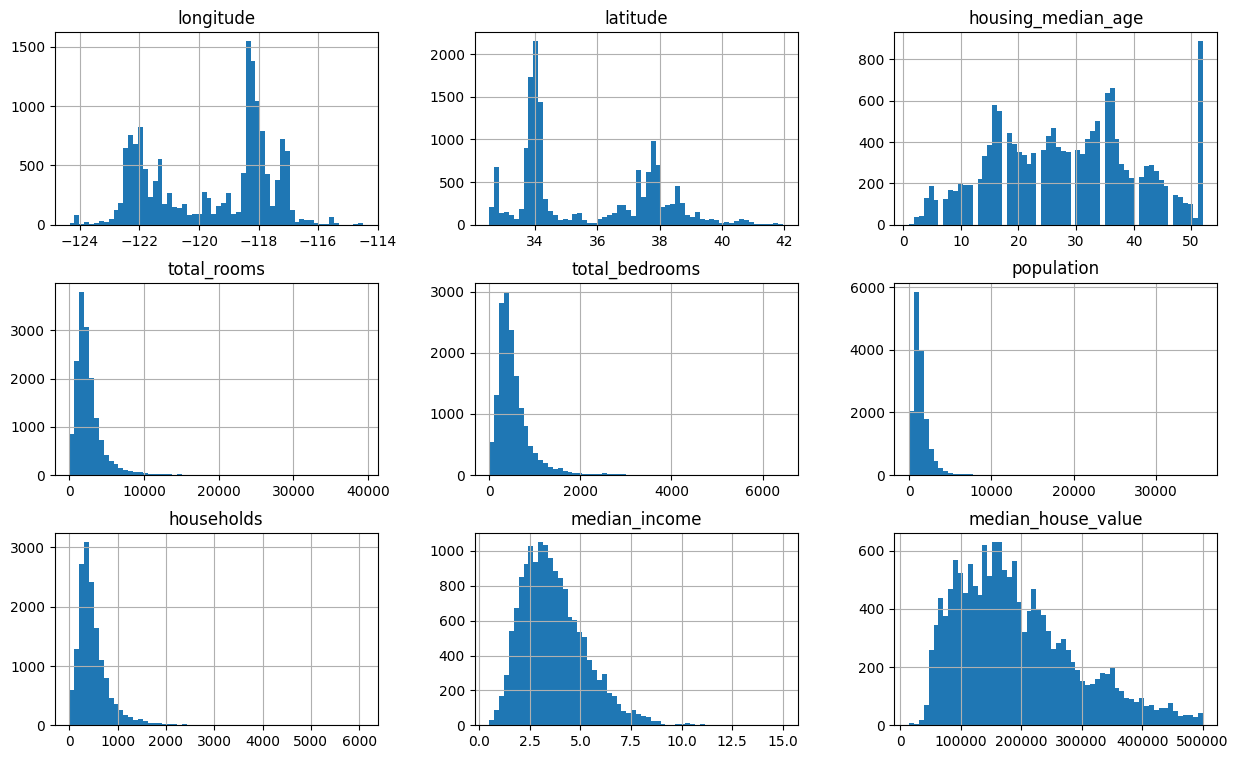

In [230]:
# Remove outlier (maxvalue for median_house_value)
maxval2 = train_data['median_house_value'].max() # get the maximum value

train_data = train_data[train_data['median_house_value'] != maxval2]
test_data = test_data[test_data['median_house_value'] != maxval2]

train_data.hist(bins=60, figsize=(15,9));

plt.show() # looks like its completely removed.

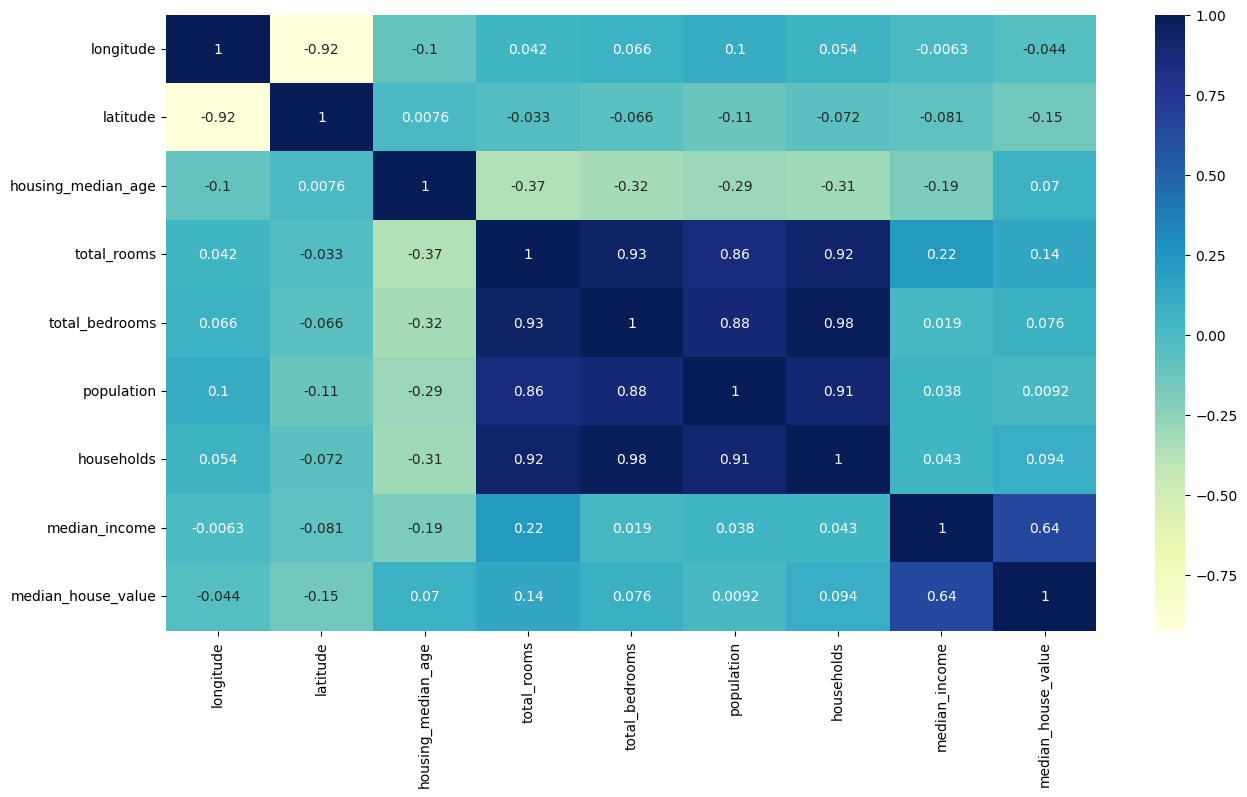

In [231]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()


In [232]:
# take log of right skewed distributions to make it look more Gaussian

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

<ipython-input-232-af05cb223e9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
<ipython-input-232-af05cb223e9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
<ipython-input-232-af05cb223e9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

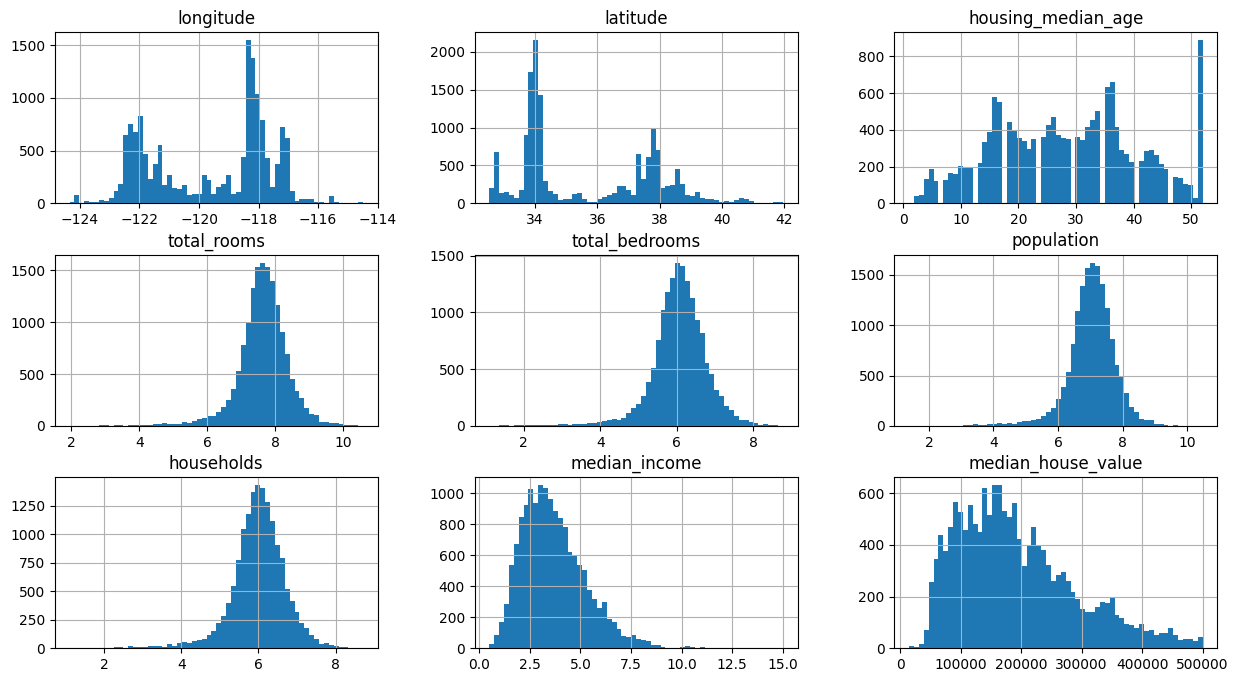

In [233]:
train_data.hist(bins = 60, figsize = (15,8))

In [234]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     6788
INLAND        5173
NEAR OCEAN    1942
NEAR BAY      1671
ISLAND           4
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

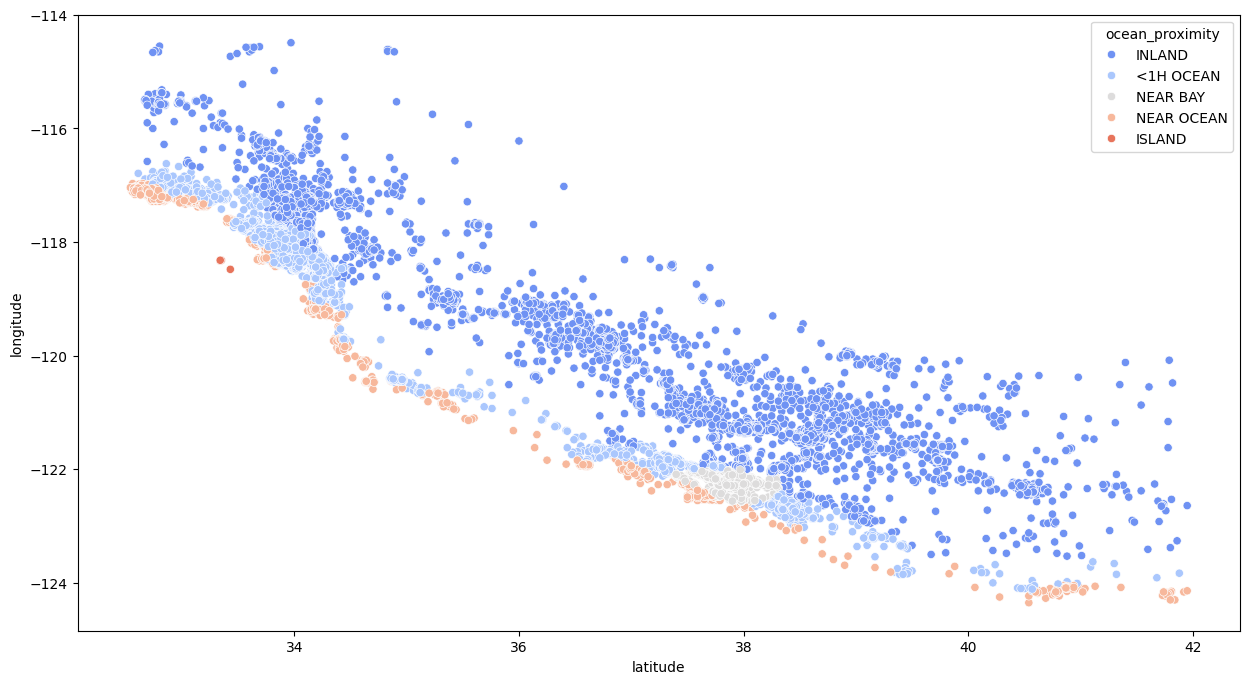

In [235]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'ocean_proximity', palette = 'coolwarm')

In [236]:
# Group data by 'ocean_proximity' category
grouped_by_proximity = train_data.groupby('ocean_proximity')


# Get descriptive statistics (mean, median, etc.) for price in each category
price_summary = grouped_by_proximity['median_house_value'].describe()
print(price_summary)

                  count           mean            std       min       25%  \
ocean_proximity                                                             
<1H OCEAN        6788.0  224593.768415   87198.240603   17500.0  162500.0   
INLAND           5173.0  123695.417746   66326.658156   14999.0   77000.0   
ISLAND              4.0  400550.000000   77181.884749  287500.0  382900.0   
NEAR BAY         1671.0  239155.655296  103364.714048   22500.0  159650.0   
NEAR OCEAN       1942.0  227282.955716  101432.556340   22500.0  145225.0   

                      50%       75%       max  
ocean_proximity                                
<1H OCEAN        208600.0  271900.0  500000.0  
INLAND           108800.0  149100.0  500000.0  
ISLAND           432350.0  450000.0  450000.0  
NEAR BAY         223100.0  316700.0  500000.0  
NEAR OCEAN       217300.0  291650.0  500000.0  


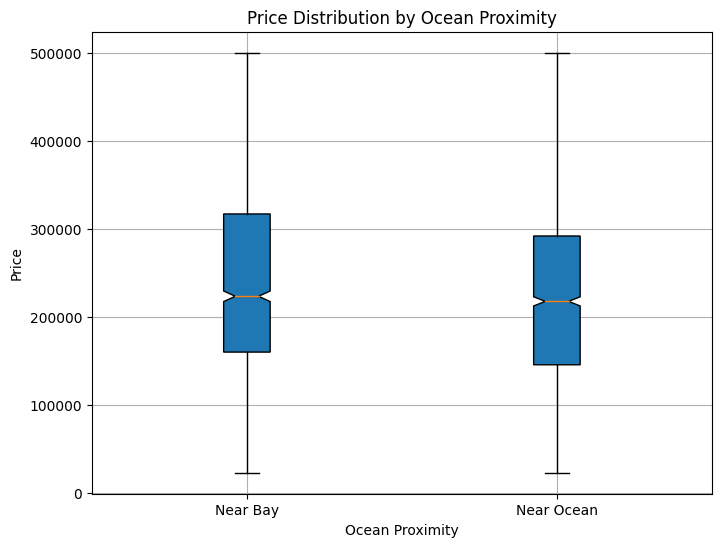

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has columns 'price' and 'ocean_proximity'

# Filter data for the two categories
near_bay_houses = train_data[train_data['ocean_proximity'] == 'NEAR BAY']
near_ocean_houses = train_data[train_data['ocean_proximity'] == 'NEAR OCEAN']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([near_bay_houses['median_house_value'], near_ocean_houses['median_house_value']], notch=True, vert=True, patch_artist=True, labels=['Near Bay', 'Near Ocean'])
plt.xlabel('Ocean Proximity')
plt.ylabel('Price')
plt.title('Price Distribution by Ocean Proximity')
plt.grid(True)
plt.show()


In [238]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9226,False,True,False,False,False
7962,True,False,False,False,False
9321,False,False,False,True,False
5034,True,False,False,False,False
17936,True,False,False,False,False
...,...,...,...,...,...
11789,False,True,False,False,False
8754,True,False,False,False,False
20502,True,False,False,False,False
17997,True,False,False,False,False


In [239]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [240]:
train_data # replace ocean_proximity with dummies for each alternative instead

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9226,-120.04,36.93,11.0,8.190632,6.551080,7.637716,6.469250,2.6941,63300.0,False,True,False,False,False
7962,-118.19,33.87,35.0,7.478735,6.079933,7.062192,5.958425,2.8750,178300.0,True,False,False,False,False
9321,-122.53,37.97,44.0,8.187577,6.860664,7.513164,6.814543,2.6036,287500.0,False,False,False,True,False
5034,-118.33,33.98,38.0,8.027477,6.680855,7.675082,6.582025,1.8472,149100.0,True,False,False,False,False
17936,-121.95,37.35,52.0,7.776115,6.261492,7.000334,6.200509,4.2656,236100.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11789,-121.23,38.79,45.0,6.811244,5.176150,6.139885,5.252273,2.2292,92000.0,False,True,False,False,False
8754,-118.36,33.82,28.0,4.219508,2.772589,3.912023,2.484907,6.1359,330000.0,True,False,False,False,False
20502,-118.68,34.33,45.0,4.804021,3.258097,4.219508,3.332205,2.9821,325000.0,True,False,False,False,False
17997,-121.96,37.28,33.0,7.570959,5.793014,6.777647,5.752573,5.4386,280400.0,True,False,False,False,False


<Axes: >

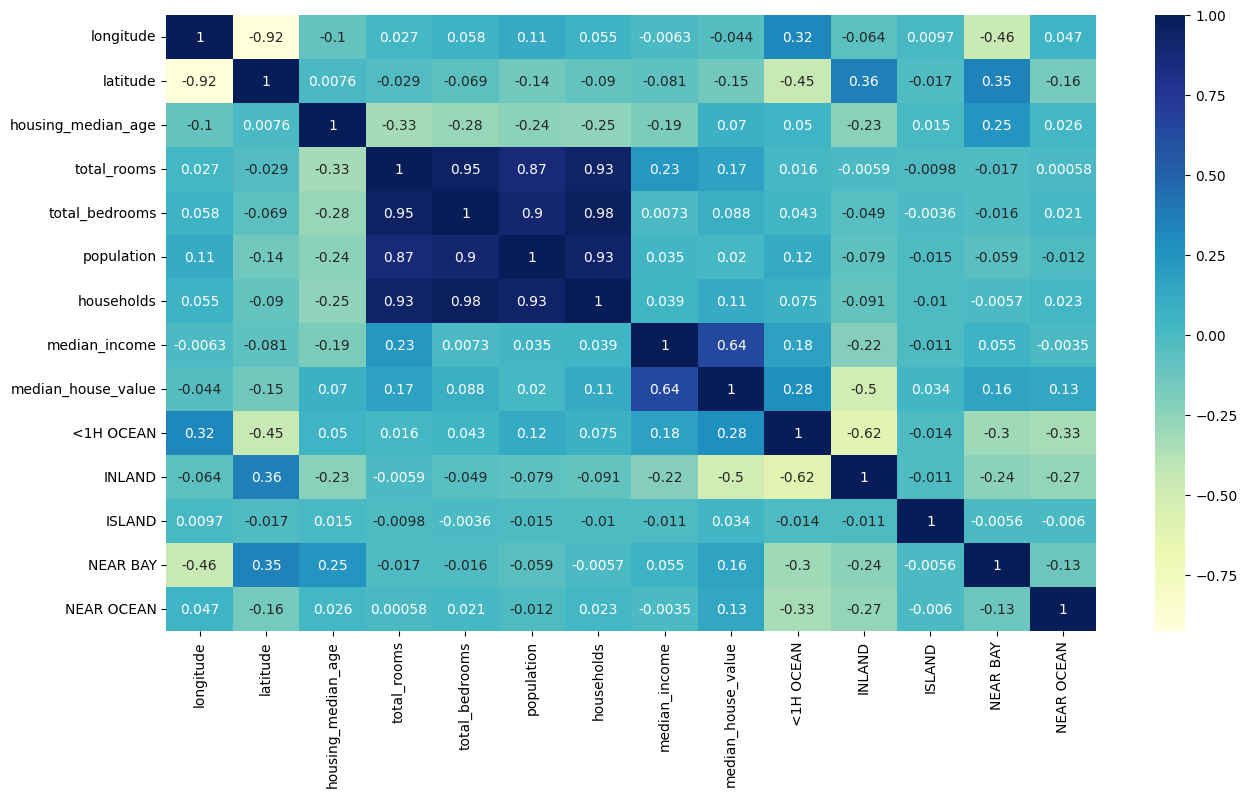

In [241]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")  # median_house_value is negatively correlated to INLAND

<Axes: xlabel='latitude', ylabel='longitude'>

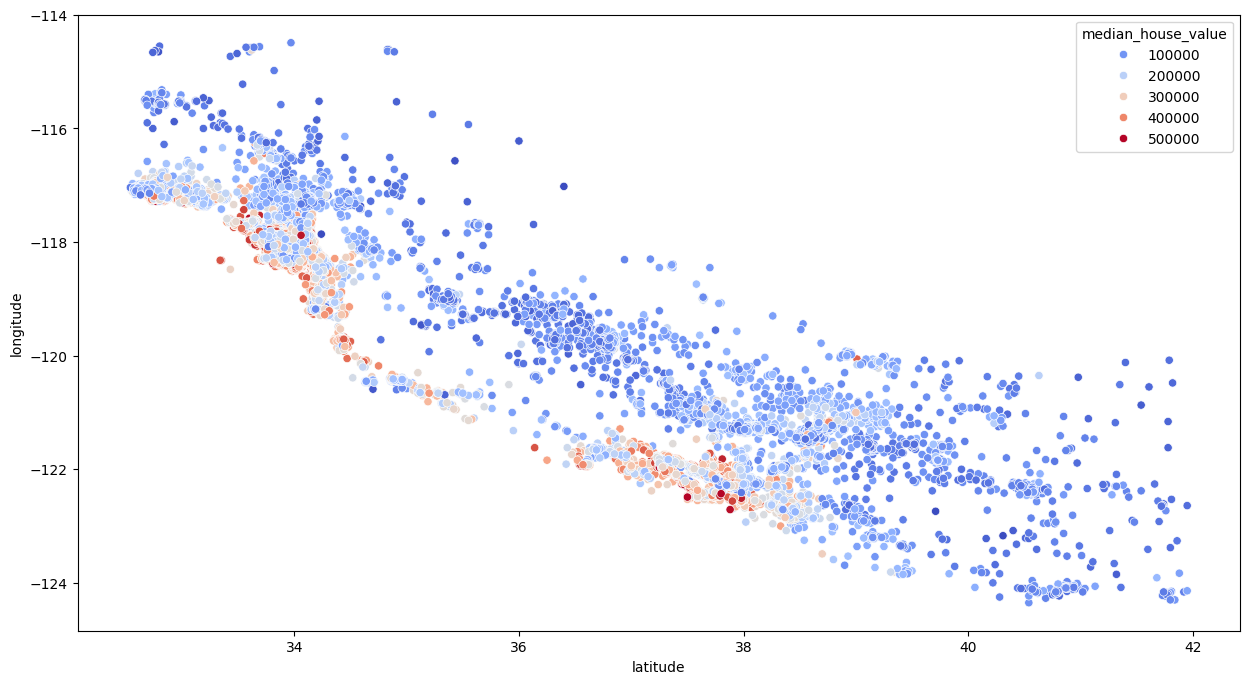

In [242]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

In [243]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [244]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

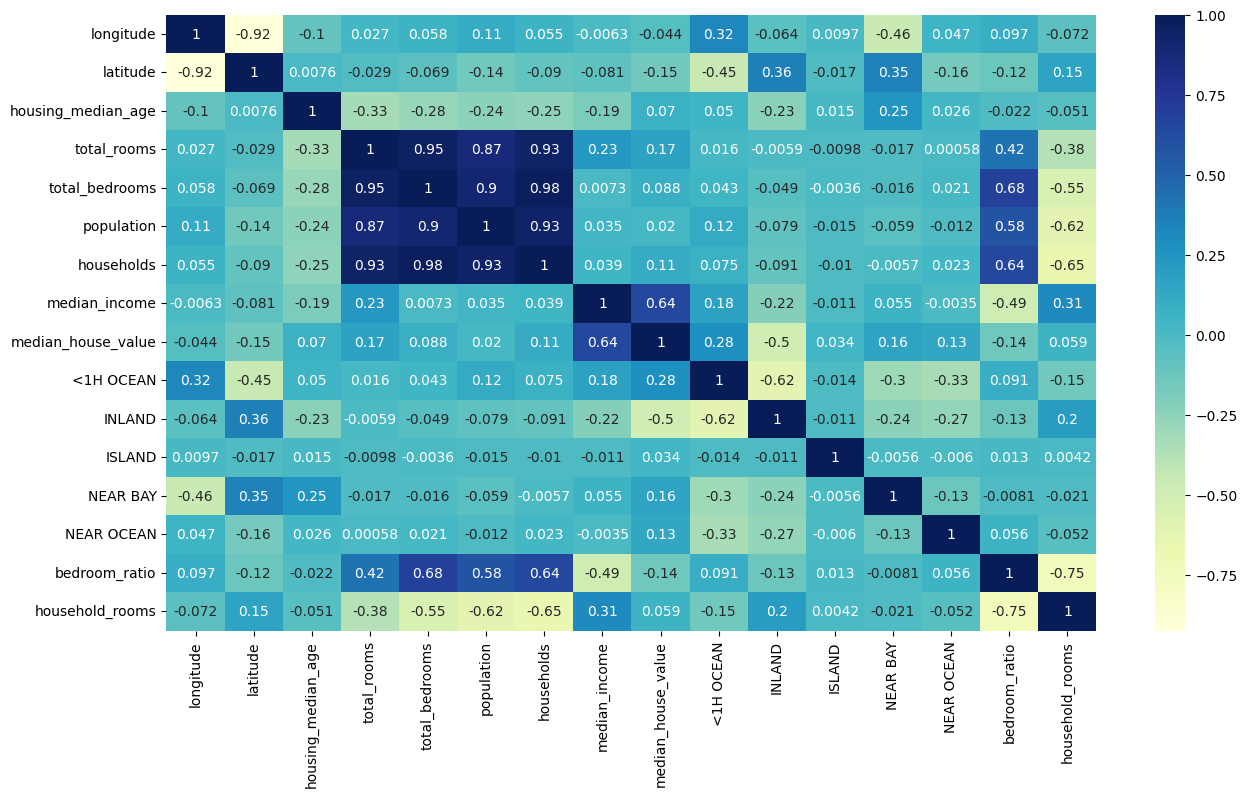

In [245]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu") # bedroom_ratio more interesting than total_bedrooms, higher correlation with median_house_value

### Linear Regression Model

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [247]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']



In [248]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']


In [249]:
X_test_s = scaler.transform(X_test)

In [250]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Get predictions from the model
y_pred_lr = reg.predict(X_test_s)


# Calculate R-squared score (already in your code)
#r2_score = reg.score(X_test_s, y_test)  # score is same as R^2 in linear regression

# Calculate R^2
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Print the results
print("R^2 score:", r2_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Mean Absolute Error (MAE):", mae_lr)




R^2 score: 0.6645798315153244
Mean Squared Error (MSE): 4385963544.533747
Mean Absolute Error (MAE): 46749.561510995016


### Ridge Regression

In [298]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_reg.fit(X_train_s, y_train)

# Predict on the test set
y_pred_ridge = ridge_reg.predict(X_test_s)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("R^2 score:", r2_ridge)
print("Mean Squared Error (MSE):", mse_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)


Ridge Regression:
R^2 score: 0.6645670760432922
Mean Squared Error (MSE): 4386130335.444322
Mean Absolute Error (MAE): 46748.22806886082


In [326]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

ridge_random_search = RandomizedSearchCV(
    Ridge(),
    param_distributions,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

ridge_random_search.fit(X_train_s, y_train)
print("Best Alpha from Random Search:", ridge_random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Alpha from Random Search: {'alpha': 0.0001}


In [327]:
# Correct way to access the best alpha from RandomizedSearchCV
best_alpha = ridge_random_search.best_params_['alpha']
print("Best Alpha from Random Search:", best_alpha)


Best Alpha from Random Search: 0.0001


In [328]:
# Initialize Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)

# Fit the model to the training data
ridge_best.fit(X_train_s, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_best.predict(X_test_s)

# Calculate R-squared
r2_ridge = r2_score(y_test, y_pred_ridge)

# Calculate Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calculate Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Print the results
print("R^2 score:", r2_ridge)
print("Mean Squared Error (MSE):", mse_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)




R^2 score: 0.6645798304637608
Mean Squared Error (MSE): 4385963558.284021
Mean Absolute Error (MAE): 46749.56136012018


### Lasso Regression

In [329]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_reg.fit(X_train_s, y_train)

# Predict on the test set
y_pred_lasso = lasso_reg.predict(X_test_s)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print("R^2 score:", r2_lasso)
print("Mean Squared Error (MSE):", mse_lasso)
print("Mean Absolute Error (MAE):", mae_lasso)


Lasso Regression:
R^2 score: 0.664592577460994
Mean Squared Error (MSE): 4385796878.190157
Mean Absolute Error (MAE): 46748.026268909794


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e+13, tolerance: 1.498e+10
  model = cd_fast.enet_coordinate_descent(


In [347]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

lasso_random_search = RandomizedSearchCV(
    Lasso(),
    param_distributions,
    n_iter=5,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

lasso_random_search.fit(X_train_s, y_train)
print("Best Alpha from Random Search:", lasso_random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+13, tolerance: 1.196e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.148e+13, tolerance: 1.204e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e+13, tolerance: 1.203e

Best Alpha from Random Search: {'alpha': 0.001}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.703e+13, tolerance: 1.498e+10
  model = cd_fast.enet_coordinate_descent(


In [348]:
# Correct way to access the best alpha from RandomizedSearchCV
best_alpha = lasso_random_search.best_params_['alpha']
print("Best Alpha from Random Search:", best_alpha)


Best Alpha from Random Search: 0.001


In [349]:
# Initialize Ridge model with the best alpha
lasso_best = Lasso(alpha=best_alpha)

# Fit the model to the training data
lasso_best.fit(X_train_s, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_best.predict(X_test_s)

# Calculate R-squared
r2_lasso = r2_score(y_test, y_pred_lasso)

# Calculate Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculate Mean Absolute Error (MAE)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Print the results
print("R^2 score:", r2_lasso)
print("Mean Squared Error (MSE):", mse_lasso)
print("Mean Absolute Error (MAE):", mae_lasso)


R^2 score: 0.6645929684579099
Mean Squared Error (MSE): 4385791765.503501
Mean Absolute Error (MAE): 46748.0761734467


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.703e+13, tolerance: 1.498e+10
  model = cd_fast.enet_coordinate_descent(


### Elastic Net

In [361]:
from sklearn.linear_model import ElasticNet


# Initialize and train the Elastic Net Regression model
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.6)  # alpha is the regularization strength, l1_ratio is the balance between L1 and L2 regularization
elastic_net.fit(X_train_s, y_train)

# Predict on the test set
y_pred_elastic = elastic_net.predict(X_test_s)

# Evaluate the model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("Elastic Net Regression:")
print("R^2 score:", r2_elastic)
print("Mean Squared Error (MSE):", mse_elastic)
print("Mean Absolute Error (MAE):", mae_elastic)


Elastic Net Regression:
R^2 score: 0.6644506595654854
Mean Squared Error (MSE): 4387652600.578079
Mean Absolute Error (MAE): 46746.682532999475


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.711e+13, tolerance: 1.498e+10
  model = cd_fast.enet_coordinate_descent(


### Random Forest Classifier

In [383]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [384]:
# Get predictions from the model
y_pred_rfr = forest.predict(X_test_s)

# Import r2_score from sklearn.metrics (assuming it's not already imported)
from sklearn.metrics import r2_score

# Calculate R^2
r2_rfr = r2_score(y_test, y_pred_rfr)

# Calculate Mean Squared Error (MSE)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

# Calculate Mean Absolute Error (MAE)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Print the results
print("R^2 score:", r2_rfr)
print("Mean Squared Error (MSE):", mse_rfr)
print("Mean Absolute Error (MAE):", mae_rfr)


R^2 score: 0.8067546947256061
Mean Squared Error (MSE): 2526881039.726475
Mean Absolute Error (MAE): 33406.380156594074


In [385]:
forest.feature_importances_

array([1.09877422e-01, 9.74169054e-02, 4.76957939e-02, 2.40852851e-02,
       1.69443411e-02, 3.02645203e-02, 1.48189225e-02, 4.27753537e-01,
       2.60541863e-03, 1.58308273e-01, 2.58504202e-04, 9.33004643e-04,
       6.67918253e-03, 3.53211422e-02, 2.70377475e-02])

In [386]:
feature_names = X_train.columns
feature_names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'household_rooms'],
      dtype='object')

In [387]:
rfr_feature_importances = dict(zip(feature_names, forest.feature_importances_))
rfr_feature_importances = {k: v for k,v in sorted(rfr_importances.items(), key = lambda x: x[1], reverse = True)}
rfr_feature_importances

{'median_income': 0.4270539344437385,
 'INLAND': 0.15859890654466416,
 'longitude': 0.11014399471229398,
 'latitude': 0.09786521034443385,
 'housing_median_age': 0.0470515590590969,
 'bedroom_ratio': 0.03523100279002928,
 'population': 0.030729999894337168,
 'household_rooms': 0.026913523335106142,
 'total_rooms': 0.0236932897965684,
 'total_bedrooms': 0.017103878160411295,
 'households': 0.015064179211844629,
 'NEAR OCEAN': 0.006652533165986521,
 '<1H OCEAN': 0.002802512899034001,
 'NEAR BAY': 0.0008481014505079536,
 'ISLAND': 0.000247374191947343}

<ipython-input-388-39a2ad35d1e9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rfr_importance_df, palette='viridis')


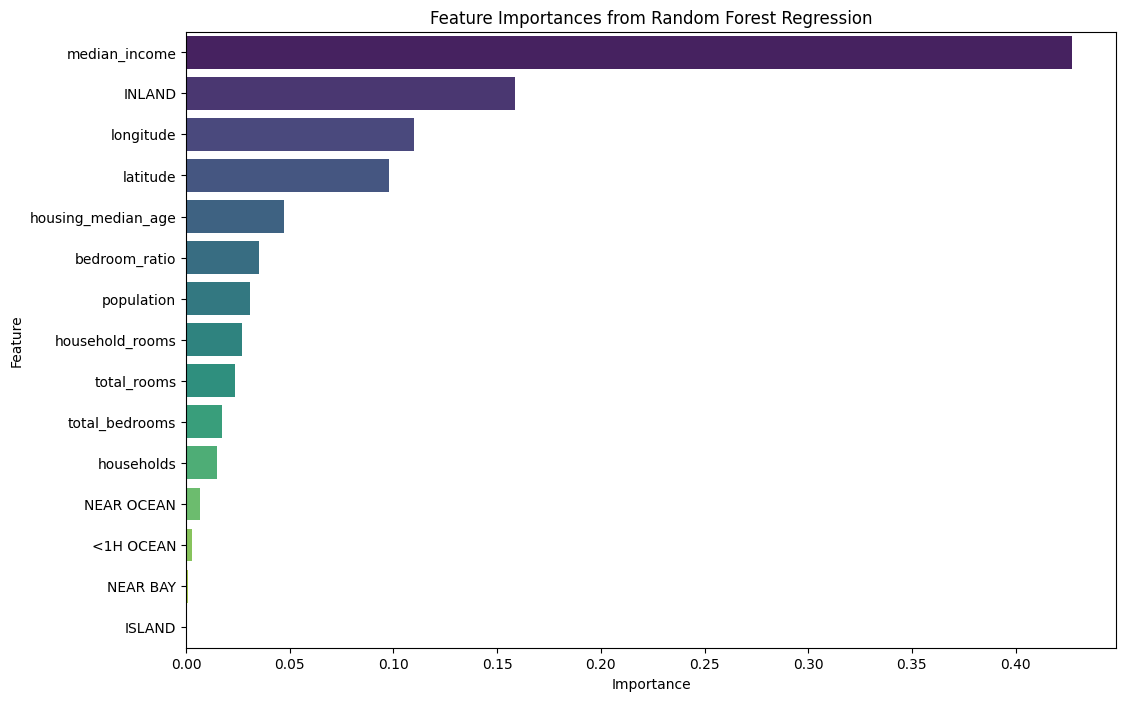

In [388]:
# Convert the dictionary to a DataFrame
rfr_importance_df = pd.DataFrame({
    'Feature': list(rfr_feature_importances.keys()),
    'Importance': list(rfr_feature_importances.values())
})

# Sort the DataFrame by importance in descending order
rfr_importance_df = rfr_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rfr_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Regression')
plt.show()

In [257]:
#forest.score(X_test_s, y_test)

In [294]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [200, 250],
    'min_samples_split': [4, 6]
    #'max_depth': [None, 2]

}

grid_search = GridSearchCV(forest, param_grid, cv= 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [4, 6],
                         'n_estimators': [200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [295]:
best_forest = grid_search.best_estimator_

In [296]:
best_forest

RandomForestRegressor(min_samples_split=4, n_estimators=250)

In [ ]:
#best_forest.score(X_test_s, y_test)

In [297]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict using the best model on the training data
y_pred_rfr = best_forest.predict(X_test_s)

# Calculate MSE
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

# Calculate MAE
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Calculate R-squared (note the sign change for consistency with GridSearchCV scoring)
r2_rfr = r2_score(y_test, y_pred_rfr)

# Print the results
print("MSE:", mse_rfr)
print("MAE:", mae_rfr)
print("R-squared:", r2_rfr)


MSE: 2530565160.3512664
MAE: 33279.586002295946
R-squared: 0.8064729485715083


### Gradient Boosting Regression

In [263]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(X_train_s, y_train)


GradientBoostingRegressor()

In [264]:
# Making predictions
y_pred_gb = gb.predict(X_test_s)

In [265]:
gb.score(X_test_s, y_test)

0.7483089603412922

In [270]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [200, 250],
  #  'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7]
}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_s, y_train)

print("Best Parameters: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

Best Parameters:  {'max_depth': 5, 'n_estimators': 200}


In [271]:
# Predict using the best model on the training data
y_pred_xgb = best_gb.predict(X_test_s)


# Calculate R^2
r2_gb = r2_score(y_test, y_pred_xgb)

# Calculate Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, y_pred_xgb)

# Calculate Mean Absolute Error (MAE)
mae_gb = mean_absolute_error(y_test, y_pred_xgb)

# Print the results
print("R^2 score:", r2_gb)
print("Mean Squared Error (MSE):", mse_gb)
print("Mean Absolute Error (MAE):", mae_gb)

R^2 score: 0.8294716189118867
Mean Squared Error (MSE): 2229833900.9837856
Mean Absolute Error (MAE): 31540.79692376688


### XGBOOST Regression

In [272]:
!pip install xgboost



In [362]:
from xgboost import XGBRegressor


In [363]:
# Training the model
xgb = XGBRegressor()
xgb.fit(X_train_s, y_train)

# Making predictions
y_pred_xgb = xgb.predict(X_test)

In [364]:
xgb.score(X_test_s, y_test)

0.8326437201543981

In [372]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [500, 600, 800],
    'max_depth': [4, 6],
    'learning_rate': [0.1, 0.2]
}

xgb = XGBRegressor()
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_s, y_train)

print("Best Parameters: ", grid_search.best_params_)
best_xgb = grid_search.best_estimator_


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 600}


In [375]:
# Predict using the best model on the training data
y_pred_xgb = best_xgb.predict(X_test_s)


# Calculate R^2
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print the results
print("R^2 score:", r2_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)


R^2 score: 0.8490893765038029
Mean Squared Error (MSE): 1973311551.6797502
Mean Absolute Error (MAE): 29455.807919929044


In [376]:
feature_names = X_train.columns
feature_names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'household_rooms'],
      dtype='object')

In [377]:
xgb_importances = dict(zip(feature_names, best_xgb.feature_importances_))
xgb_importances = {k: v for k,v in sorted(xgb_importances.items(), key = lambda x: x[1], reverse = True)}
xgb_importances

{'INLAND': 0.6454695,
 'median_income': 0.11350488,
 'ISLAND': 0.07172626,
 'NEAR OCEAN': 0.025917334,
 'longitude': 0.021133414,
 'latitude': 0.020859899,
 'NEAR BAY': 0.015556204,
 '<1H OCEAN': 0.014997604,
 'housing_median_age': 0.014007288,
 'population': 0.012152441,
 'bedroom_ratio': 0.011005219,
 'households': 0.0095140105,
 'total_bedrooms': 0.009327713,
 'total_rooms': 0.008307688,
 'household_rooms': 0.0065205256}

<ipython-input-378-07949f59fa08>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, palette='viridis')


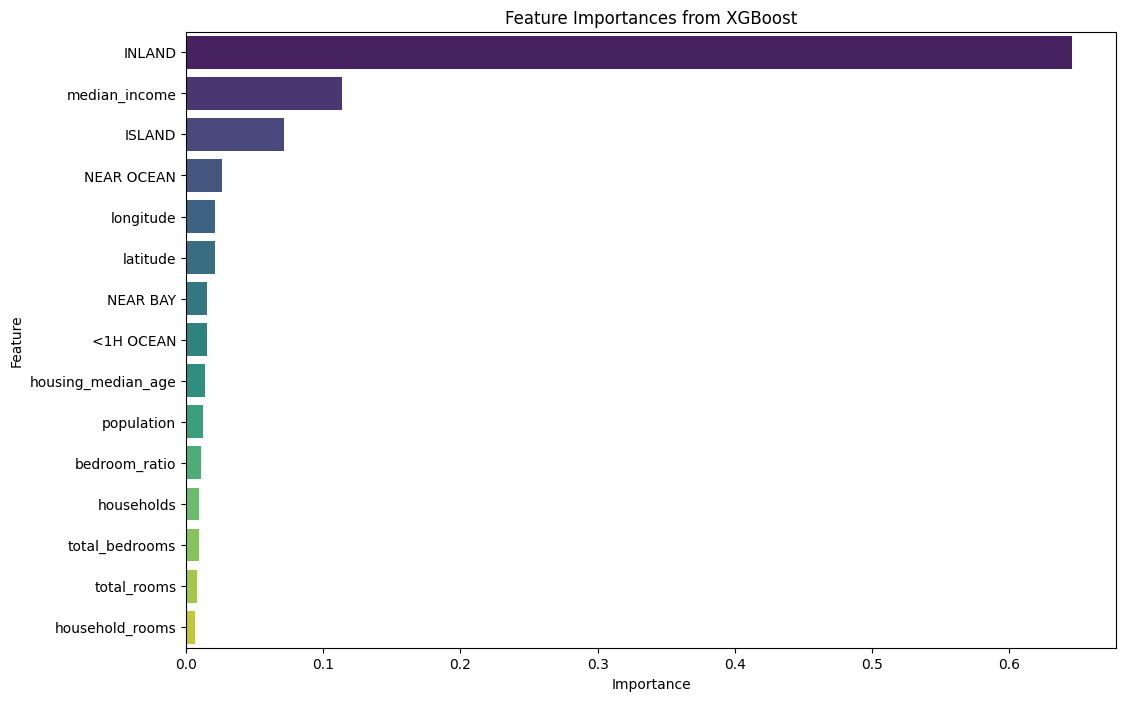

In [378]:
# Convert the dictionary to a DataFrame
xgb_importance_df = pd.DataFrame({
    'Feature': list(xgb_importances.keys()),
    'Importance': list(xgb_importances.values())
})

# Sort the DataFrame by importance in descending order
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from XGBoost')
plt.show()

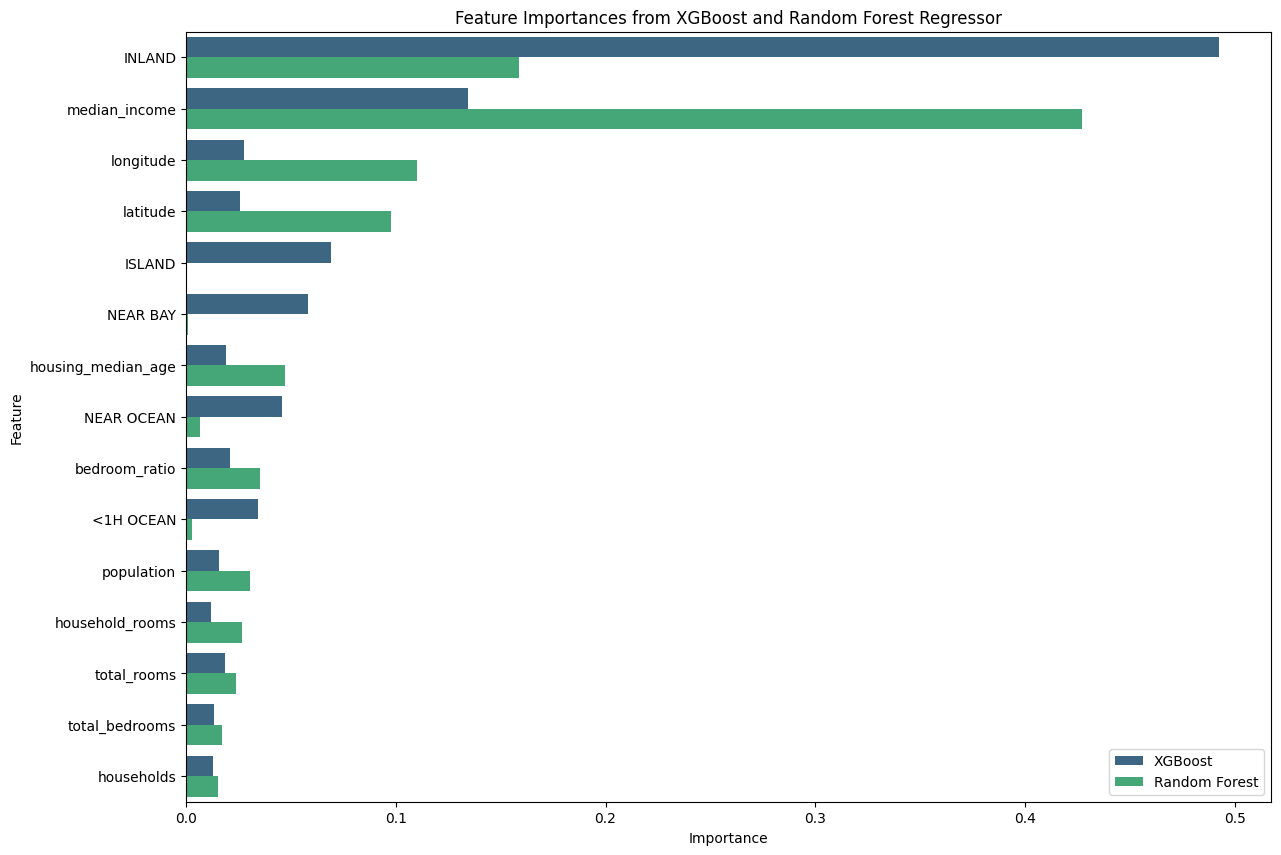

In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert to DataFrame for plotting
xgb_importance_df = pd.DataFrame({
    'Feature': list(xgb_feature_importances.keys()),
    'Importance': list(xgb_feature_importances.values()),
    'Model': 'XGBoost'
})

rfr_importance_df = pd.DataFrame({
    'Feature': list(rfr_feature_importances.keys()),
    'Importance': list(rfr_feature_importances.values()),
    'Model': 'Random Forest'
})

# Combine DataFrames
importances_df = pd.concat([xgb_importance_df, rfr_importance_df])

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', hue='Model', data=importances_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from XGBoost and Random Forest Regressor')
plt.legend(loc='best')
plt.show()


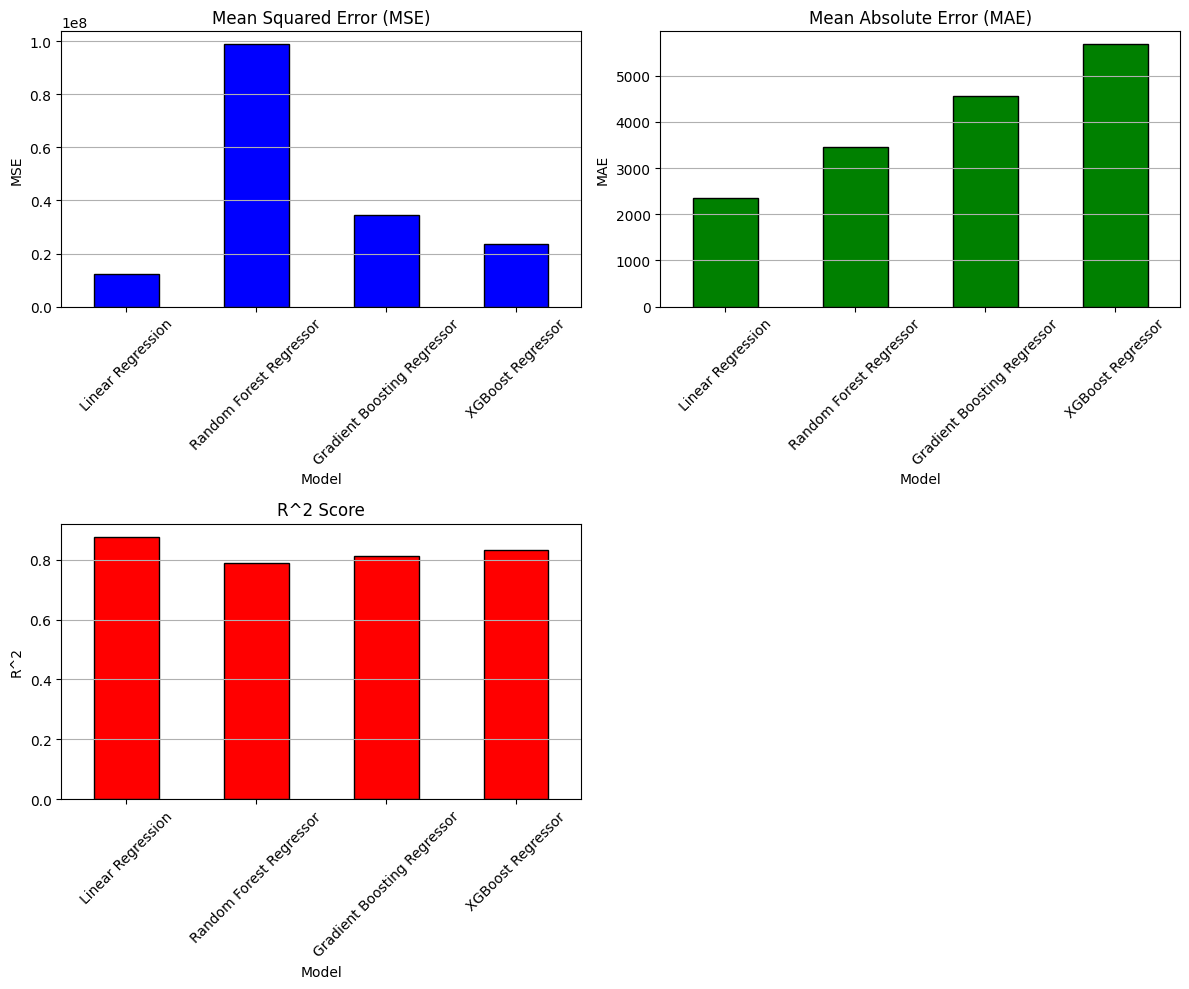

In [212]:
import matplotlib.pyplot as plt
import pandas as pd

# Example metrics (replace these with your actual values)
metrics = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor'],
    'MSE': [12345678.9, 98765432.1, 34567890.1, 23456789.0],
    'MAE': [2345.67, 3456.78, 4567.89, 5678.90],
    'R^2': [0.876, 0.789, 0.812, 0.834]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

import matplotlib.pyplot as plt
import pandas as pd

# Example metrics (replace these with your actual values)
metrics = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor'],
    'MSE': [12345678.9, 98765432.1, 34567890.1, 23456789.0],
    'MAE': [2345.67, 3456.78, 4567.89, 5678.90],
    'R^2': [0.876, 0.789, 0.812, 0.834]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Set the index to the model names
metrics_df.set_index('Model', inplace=True)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=False)

# Plot MSE
metrics_df['MSE'].plot(kind='bar', ax=axs[0, 0], color='blue', edgecolor='black')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].set_xlabel('Model')
axs[0, 0].grid(axis='y')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot MAE
metrics_df['MAE'].plot(kind='bar', ax=axs[0, 1], color='green', edgecolor='black')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].set_xlabel('Model')
axs[0, 1].grid(axis='y')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot R^2
metrics_df['R^2'].plot(kind='bar', ax=axs[1, 0], color='red', edgecolor='black')
axs[1, 0].set_title('R^2 Score')
axs[1, 0].set_ylabel('R^2')
axs[1, 0].set_xlabel('Model')
axs[1, 0].grid(axis='y')
axs[1, 0].tick_params(axis='x', rotation=45)

# Empty plot for the last subplot (you can remove or use it for other metrics if needed)
axs[1, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


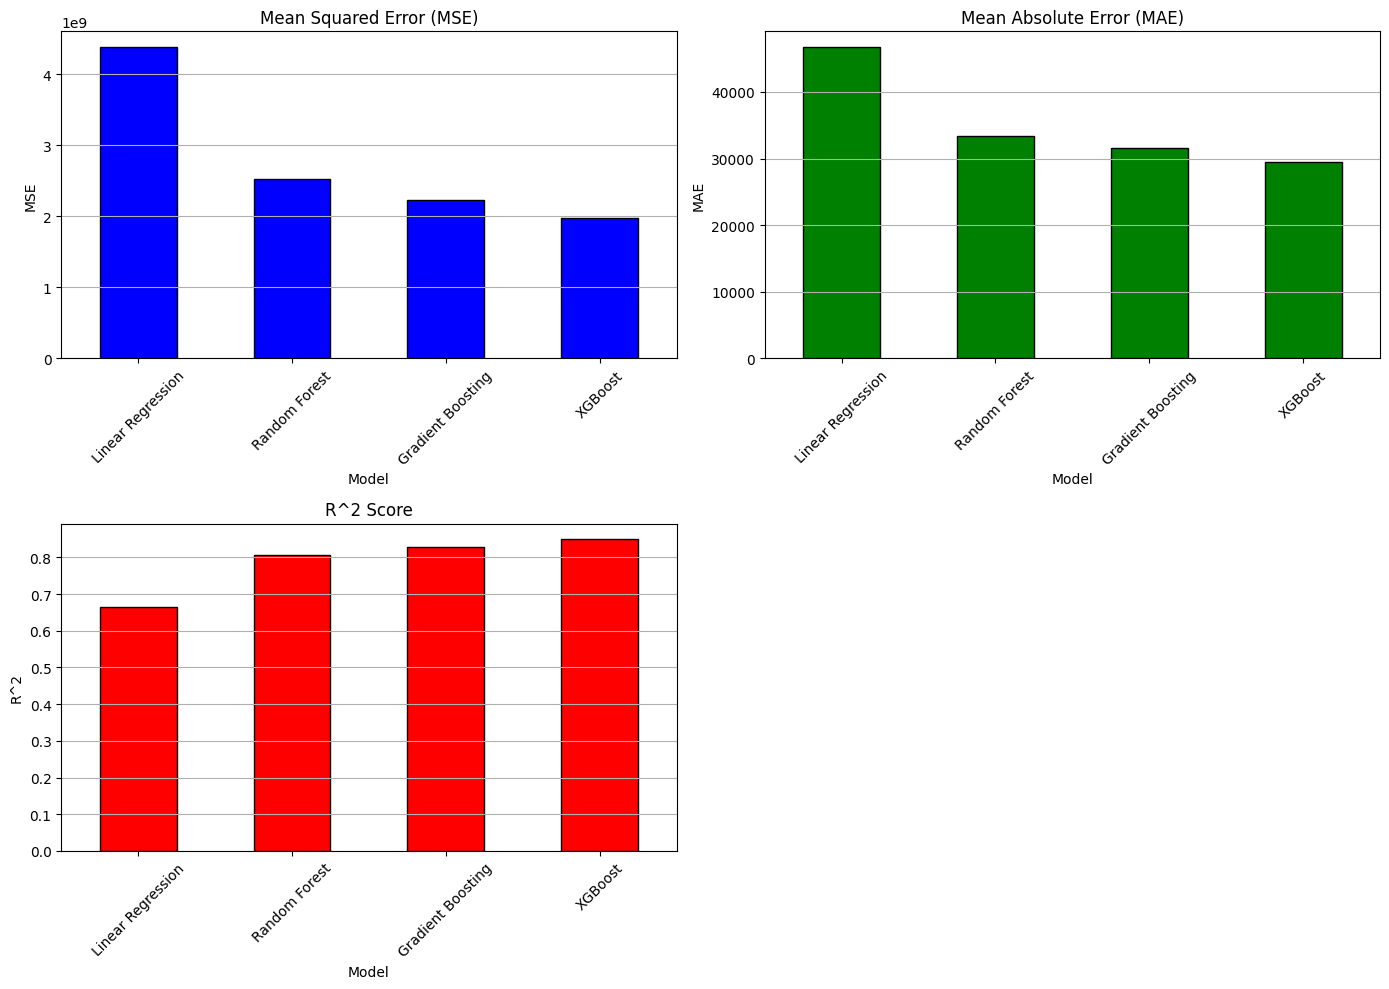

In [390]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming these are your calculated metrics for each model
#mse_lr = 12345678.9
#mae_lr = 2345.67
#r2_lr = 0.856

#mse_rfr = 98765432.1
#mae_rfr = 3456.78
#r2_rfr = 0.789

#mse_gb = 34567890.1
#mae_gb = 4567.89
#r2_gb = 0.812

#mse_xgb = 23456789.0
#mae_xgb = 5678.90
#r2_xgb = 0.834

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame({
    'MSE': [mse_lr, mse_rfr, mse_gb, mse_xgb],
    'MAE': [mae_lr, mae_rfr, mae_gb, mae_xgb],
    'R^2': [r2_lr, r2_rfr, r2_gb, r2_xgb]
}, index=['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

# Plot MSE
metrics_df['MSE'].plot(kind='bar', ax=axs[0, 0], color='blue', edgecolor='black')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].set_xlabel('Model')
axs[0, 0].grid(axis='y')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot MAE
metrics_df['MAE'].plot(kind='bar', ax=axs[0, 1], color='green', edgecolor='black')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].set_xlabel('Model')
axs[0, 1].grid(axis='y')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot R^2
metrics_df['R^2'].plot(kind='bar', ax=axs[1, 0], color='red', edgecolor='black')
axs[1, 0].set_title('R^2 Score')
axs[1, 0].set_ylabel('R^2')
axs[1, 0].set_xlabel('Model')
axs[1, 0].grid(axis='y')
axs[1, 0].tick_params(axis='x', rotation=45)

# Empty plot for the last subplot (you can use it for other metrics if needed)
axs[1, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


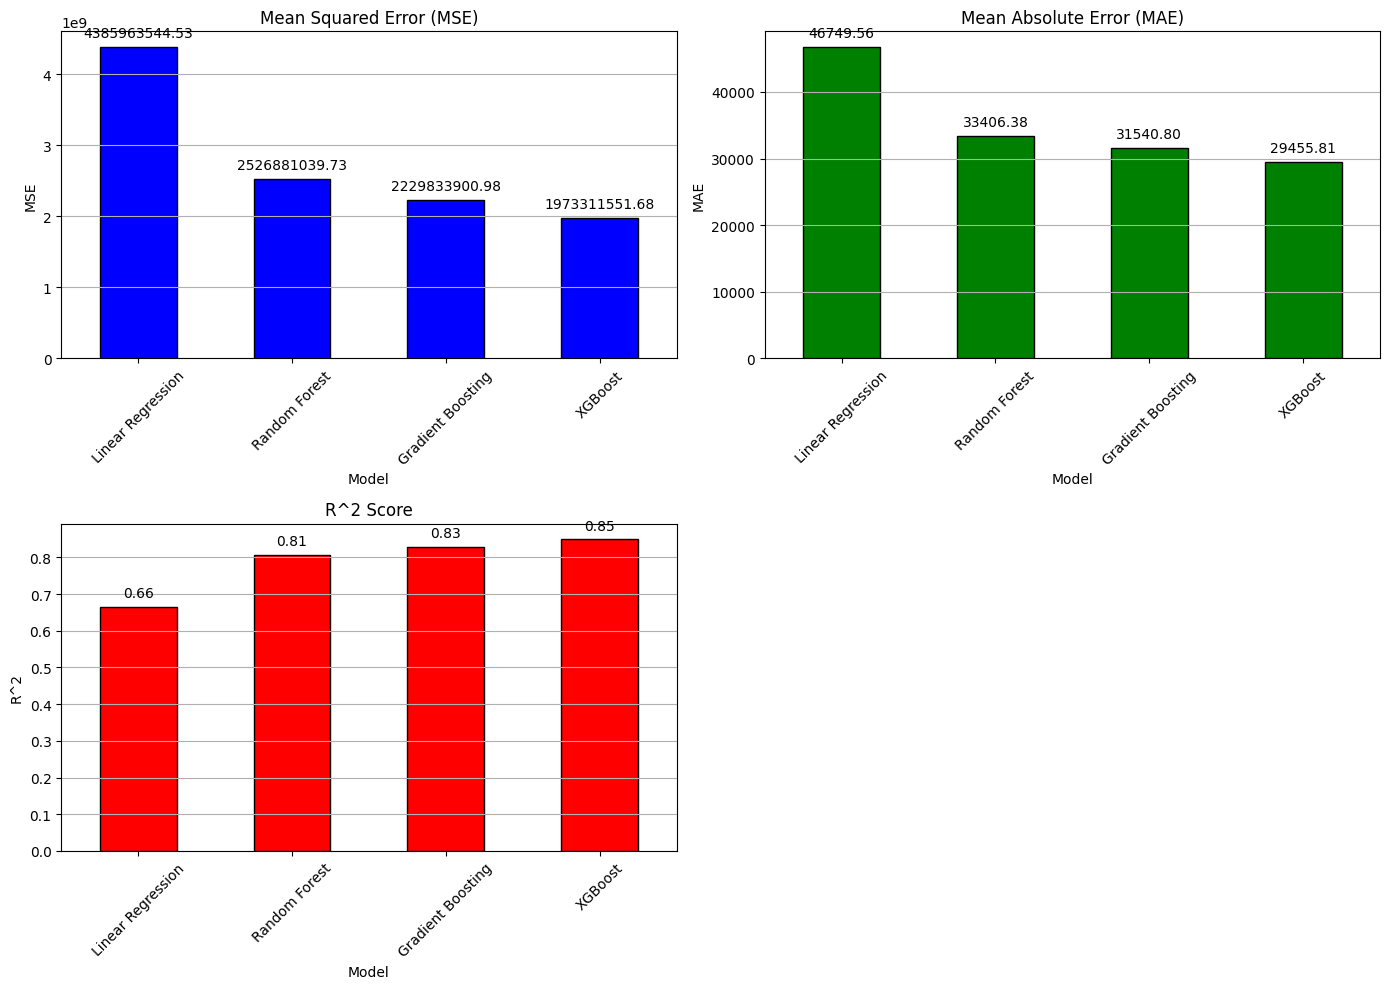

In [391]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame({
    'MSE': [mse_lr, mse_rfr, mse_gb, mse_xgb],
    'MAE': [mae_lr, mae_rfr, mae_gb, mae_xgb],
    'R^2': [r2_lr, r2_rfr, r2_gb, r2_xgb]
}, index=['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

# Function to add values on top of bars
def add_values_on_top(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot MSE
mse_ax = metrics_df['MSE'].plot(kind='bar', ax=axs[0, 0], color='blue', edgecolor='black')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].set_xlabel('Model')
axs[0, 0].grid(axis='y')
axs[0, 0].tick_params(axis='x', rotation=45)
add_values_on_top(mse_ax)

# Plot MAE
mae_ax = metrics_df['MAE'].plot(kind='bar', ax=axs[0, 1], color='green', edgecolor='black')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].set_xlabel('Model')
axs[0, 1].grid(axis='y')
axs[0, 1].tick_params(axis='x', rotation=45)
add_values_on_top(mae_ax)

# Plot R^2
r2_ax = metrics_df['R^2'].plot(kind='bar', ax=axs[1, 0], color='red', edgecolor='black')
axs[1, 0].set_title('R^2 Score')
axs[1, 0].set_ylabel('R^2')
axs[1, 0].set_xlabel('Model')
axs[1, 0].grid(axis='y')
axs[1, 0].tick_params(axis='x', rotation=45)
add_values_on_top(r2_ax)

# Empty plot for the last subplot (you can use it for other metrics if needed)
axs[1, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


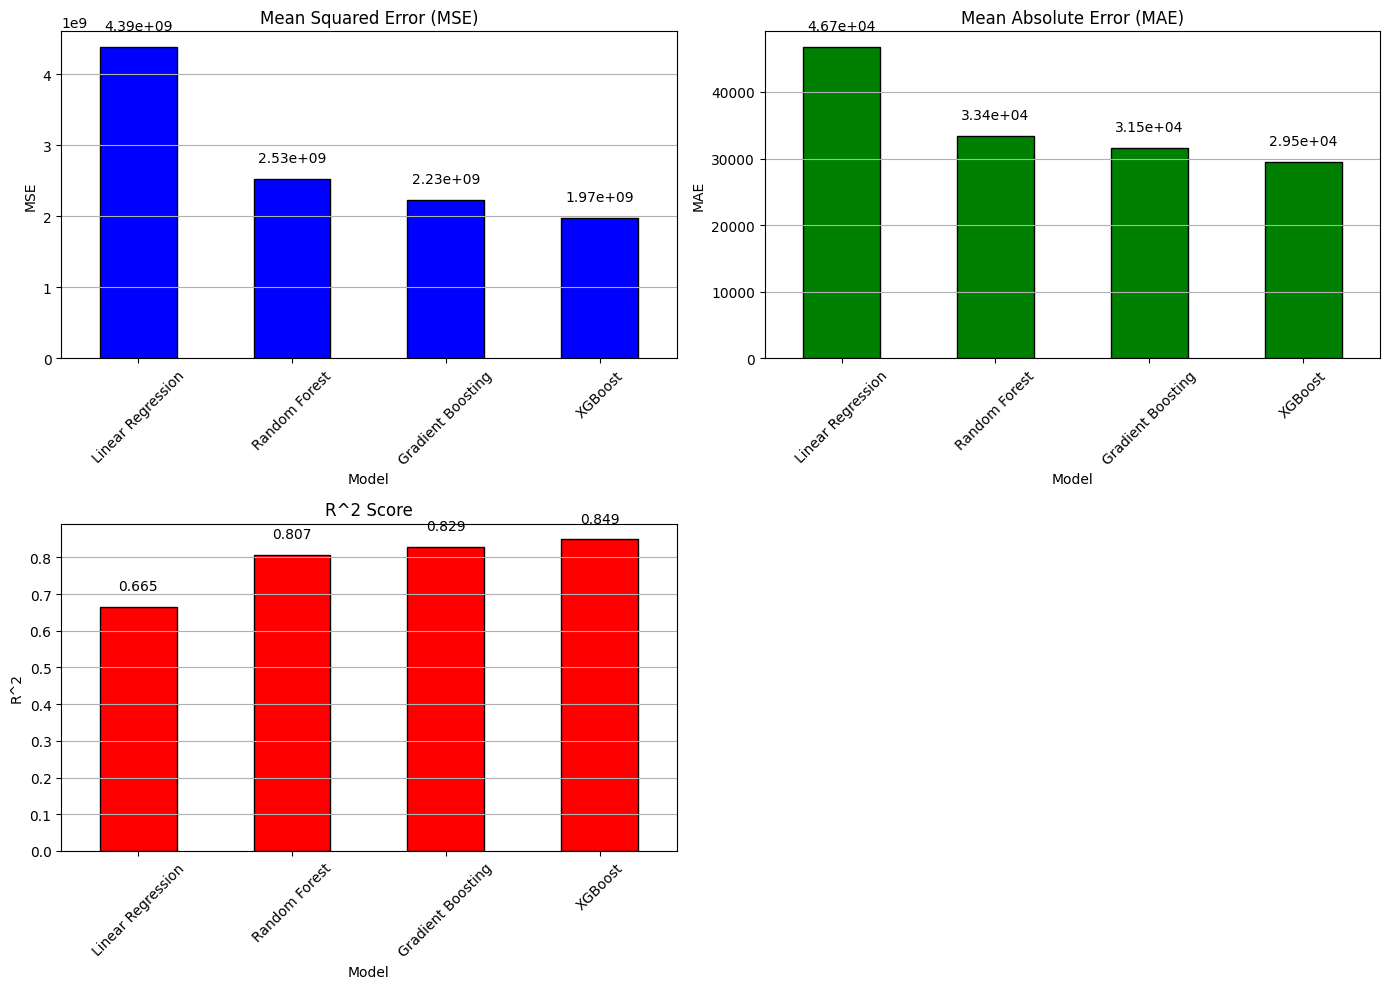

In [392]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame({
    'MSE': [mse_lr, mse_rfr, mse_gb, mse_xgb],
    'MAE': [mae_lr, mae_rfr, mae_gb, mae_xgb],
    'R^2': [r2_lr, r2_rfr, r2_gb, r2_xgb]
}, index=['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

# Function to add values on top of bars
def add_values_on_top(ax, scientific=False):
    for p in ax.patches:
        if scientific:
            ax.annotate(f'{p.get_height():.2e}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 15), textcoords='offset points')
        else:
            ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 15), textcoords='offset points')

# Plot MSE
mse_ax = metrics_df['MSE'].plot(kind='bar', ax=axs[0, 0], color='blue', edgecolor='black')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].set_xlabel('Model')
axs[0, 0].grid(axis='y')
axs[0, 0].tick_params(axis='x', rotation=45)
add_values_on_top(mse_ax, scientific=True)

# Plot MAE
mae_ax = metrics_df['MAE'].plot(kind='bar', ax=axs[0, 1], color='green', edgecolor='black')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].set_xlabel('Model')
axs[0, 1].grid(axis='y')
axs[0, 1].tick_params(axis='x', rotation=45)
add_values_on_top(mae_ax, scientific=True)

# Plot R^2
r2_ax = metrics_df['R^2'].plot(kind='bar', ax=axs[1, 0], color='red', edgecolor='black')
axs[1, 0].set_title('R^2 Score')
axs[1, 0].set_ylabel('R^2')
axs[1, 0].set_xlabel('Model')
axs[1, 0].grid(axis='y')
axs[1, 0].tick_params(axis='x', rotation=45)
add_values_on_top(r2_ax)

# Empty plot for the last subplot (you can use it for other metrics if needed)
axs[1, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv("/Users/andreas/housing.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features and target
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred = rf_reg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("Random Forest Regressor R^2 score:", r2)


Random Forest Regressor R^2 score: 0.8270675618718092


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 2803155373.2822113
Mean Absolute Error (MAE): 34833.1053055161


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

# Evaluate the best model
best_rf_reg = grid_search.best_estimator_
y_pred = best_rf_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Improved Random Forest Regressor R^2 score:", r2)


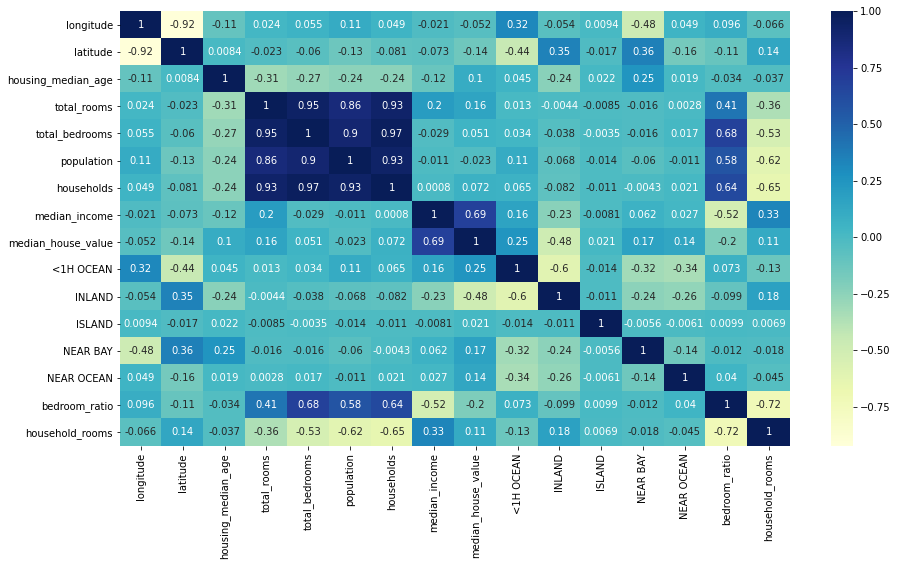

median_house_value    1.000000
median_income         0.687005
<1H OCEAN             0.250624
NEAR BAY              0.166921
total_rooms           0.156840
NEAR OCEAN            0.137440
household_rooms       0.114147
housing_median_age    0.103722
households            0.071533
total_bedrooms        0.051474
ISLAND                0.021211
population           -0.022791
longitude            -0.052368
latitude             -0.136317
bedroom_ratio        -0.200601
INLAND               -0.481379
Name: median_house_value, dtype: float64
Selected features: Index(['median_house_value', 'median_income', '<1H OCEAN', 'NEAR BAY',
       'total_rooms', 'NEAR OCEAN', 'household_rooms', 'housing_median_age',
       'latitude', 'bedroom_ratio', 'INLAND'],
      dtype='object')
Model R^2 score with selected features: 0.6248547496899021


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv("/Users/andreas/housing.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features and target
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Combine training data for processing
train_data = X_train.join(y_train)

# Log transform skewed features
for feature in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    train_data[feature] = np.log(train_data[feature] + 1)

# One-hot encode categorical features
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

# Create additional features
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

# Visualize the correlation matrix
plt.figure(figsize=(15, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

# Check correlations with the target variable
corr_with_target = corr_matrix['median_house_value'].sort_values(ascending=False)
print(corr_with_target)

# Select features with correlation greater than 0.1 or less than -0.1
selected_features = corr_with_target[(corr_with_target > 0.1) | (corr_with_target < -0.1)].index
print("Selected features:", selected_features)

# Prepare the selected training data
train_data_selected = train_data[selected_features]

# Remove the target from the selected features for training
X_train_selected = train_data_selected.drop(['median_house_value'], axis=1)
y_train_selected = train_data_selected['median_house_value']

# Standardize the selected features
scaler = StandardScaler()
X_train_selected_s = scaler.fit_transform(X_train_selected)

# Retrain the linear regression model with selected features
reg = LinearRegression()
reg.fit(X_train_selected_s, y_train_selected)

# Prepare the test data with selected features
test_data = X_test.join(y_test)
for feature in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    test_data[feature] = np.log(test_data[feature] + 1)
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

# Filter the test data to include only the selected features
test_data_selected = test_data[selected_features]

# Remove the target from the test data for prediction
X_test_selected = test_data_selected.drop(['median_house_value'], axis=1)
y_test_selected = test_data_selected['median_house_value']

# Standardize the selected test features
X_test_selected_s = scaler.transform(X_test_selected)

# Evaluate the model with selected features
selected_r2_score = reg.score(X_test_selected_s, y_test_selected)
print("Model R^2 score with selected features:", selected_r2_score)


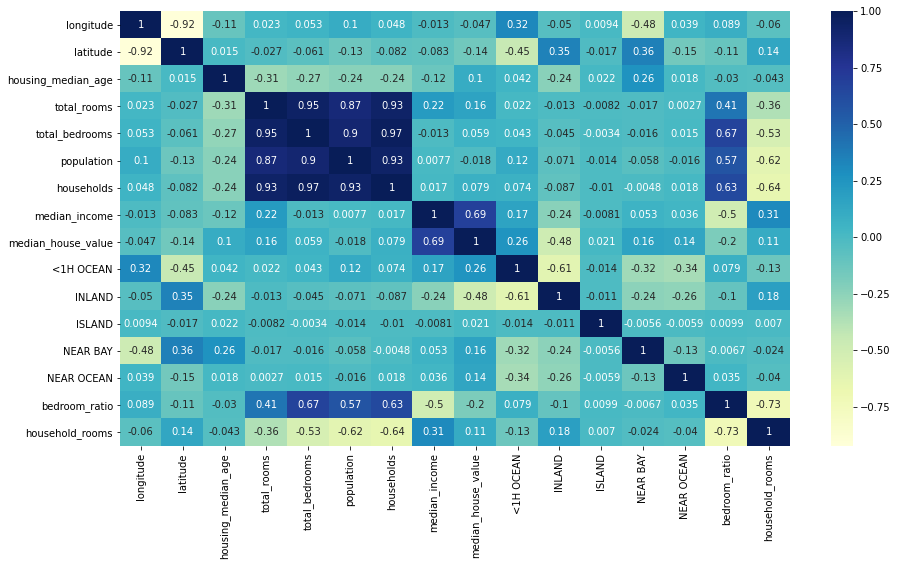

median_house_value    1.000000
median_income         0.691042
<1H OCEAN             0.258081
total_rooms           0.163409
NEAR BAY              0.158898
NEAR OCEAN            0.143786
household_rooms       0.106357
housing_median_age    0.104499
households            0.079031
total_bedrooms        0.059303
ISLAND                0.021362
population           -0.017670
longitude            -0.046703
latitude             -0.143543
bedroom_ratio        -0.195108
INLAND               -0.484938
Name: median_house_value, dtype: float64
Feature importances:
 median_income         0.482687
INLAND                0.144337
longitude             0.095466
latitude              0.086869
housing_median_age    0.050075
bedroom_ratio         0.032578
population            0.027001
household_rooms       0.024544
total_rooms           0.019151
total_bedrooms        0.014125
households            0.012581
NEAR OCEAN            0.006423
<1H OCEAN             0.003158
NEAR BAY              0.000908
ISLAND 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv("/Users/andreas/housing.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features and target
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Combine training data for processing
train_data = X_train.join(y_train)

# Log transform skewed features
for feature in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    train_data[feature] = np.log(train_data[feature] + 1)

# One-hot encode categorical features
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

# Create additional features
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

# Visualize the correlation matrix
plt.figure(figsize=(15, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

# Check correlations with the target variable
corr_with_target = corr_matrix['median_house_value'].sort_values(ascending=False)
print(corr_with_target)

# Train a RandomForestRegressor to determine feature importance
rf = RandomForestRegressor()
X_train_rf = train_data.drop(['median_house_value'], axis=1)
y_train_rf = train_data['median_house_value']
rf.fit(X_train_rf, y_train_rf)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train_rf.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print("Feature importances:\n", feature_importances)

# Select top features based on importance (e.g., top 10 features)
top_features = feature_importances.head(10).index
print("Top features:", top_features)

# Prepare the selected training data
X_train_selected = X_train_rf[top_features]
y_train_selected = y_train_rf

# Standardize the selected features
scaler = StandardScaler()
X_train_selected_s = scaler.fit_transform(X_train_selected)

# Retrain the linear regression model with selected features
reg = LinearRegression()
reg.fit(X_train_selected_s, y_train_selected)

# Prepare the test data with selected features
test_data = X_test.join(y_test)
for feature in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    test_data[feature] = np.log(test_data[feature] + 1)
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

# Filter the test data to include only the selected features
X_test_selected = test_data[top_features]
y_test_selected = test_data['median_house_value']

# Standardize the selected test features
X_test_selected_s = scaler.transform(X_test_selected)

# Evaluate the model with selected features
selected_r2_score = reg.score(X_test_selected_s, y_test_selected)
print("Model R^2 score with selected features:", selected_r2_score)


In [ ]:
# Separate your features and target variable
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

# Function to predict median house value based on input features
def predict_median_house_value(input_features):
    """
    Predicts the median house value based on input features.

    Parameters:
    input_features (dict): Dictionary containing the feature values.

    Returns:
    float: Predicted median house value.
    """
    # Convert input features to DataFrame
    input_df = pd.DataFrame([input_features])

    # Predict median house value
    predicted_value = forest.predict(input_df)

    return predicted_value[0]

# Example usage:
example_features = {
    'longitude': -118.25,
    'latitude': 34.05,
    'housing_median_age': 29,
    'total_rooms': 3000,
    'total_bedrooms': 500,
    'population': 1500,
    'households': 500,
    'median_income': 5.0,
    '<1H OCEAN': 1,
    'INLAND': 0,
    'ISLAND': 0,
    'NEAR BAY': 0,
    'NEAR OCEAN': 0
}

predicted_value = predict_median_house_value(example_features)
print(f"Predicted Median House Value: ${predicted_value:.2f}")


ValueError: Number of features of the model must match the input. Model n_features is 15 and input n_features is 13 